# Long Term Open Source Metric Analysis

# Hadoop Method Analysis

In [2]:
hadoop_versions = [
        "2.9.2", "2.9.1", "2.9.0","2.8.5", "2.8.4", "2.8.3","2.8.2", "2.8.1","2.8.0",
        "2.7.7","2.7.6","2.7.5","2.7.3","2.7.2","2.7.1","2.7.0","2.6.5", "2.6.4","2.6.3"
        ,"2.6.2","2.6.1","2.6.0","2.5.2","2.5.1","2.5.0","2.4.1","2.4.0","2.3.0"
        ,"3.3.0", "3.3.1", "3.3.2", "3.3.3", "3.3.4", "3.3.5","3.3.6"
        ,"3.2.0", "3.3.1", "3.2.2", "3.2.3", "3.2.4"
       ,"3.1.0","3.1.1","3.1.2","3.1.3","3.1.4"
       ,"3.0.0","3.0.1","3.0.2","3.0.3"
    ]


neededColumnsMethod =['cbo','cboModified','fanin','fanout','wmc','rfc','loc',
                      #'loopQty'
                      #,'returnsQty','variablesQty','parametersQty','methodsInvokedQty',
                      #'methodsInvokedLocalQty','methodsInvokedIndirectLocalQty',
                      #'comparisonsQty','tryCatchQty','parenthesizedExpsQty',
                      #'stringLiteralsQty','numbersQty','assignmentsQty','mathOperationsQty',
                      #'maxNestedBlocksQty','anonymousClassesQty','innerClassesQty',
                      #'lambdasQty','uniqueWordsQty','modifiers','logStatementsQty'
                     ]



In [3]:
import pandas as pd

classCkMetricsAllVersionsDf = pd.read_csv('DataSource/hadoop_AllCkMetricsAllVersionsMethod.csv')

In [4]:
hadoopBugsAllDf = pd.read_csv('DataSource/hadoop_bugs_all.csv')
hadoopNewFeaturesAllDf = pd.read_csv('DataSource/hadoop_newFeature_all.csv')
hadoopImprovementsAllDf = pd.read_csv('DataSource/hadoop_improvements_all.csv')

In [5]:
cleanedCkMetricsAllVersionsDf = (classCkMetricsAllVersionsDf
    .loc[~classCkMetricsAllVersionsDf['class'].str.contains("Test")]
    .loc[~classCkMetricsAllVersionsDf['class'].str.contains("test")]
    .loc[~classCkMetricsAllVersionsDf['class'].str.contains("TEST")]
    .loc[~classCkMetricsAllVersionsDf['file'].str.contains("src/test/")]
) 

In [6]:
print("Filtrelenmiş method sayısı:", cleanedCkMetricsAllVersionsDf.shape[0])
print("Versionlanmış hata sayısı:", hadoopBugsAllDf.shape[0])
print("Versionlanmış yeni özellik sayısı:", hadoopImprovementsAllDf.shape[0])
print("Versionlanmış geliştirme sayısı:", hadoopNewFeaturesAllDf.shape[0])


Filtrelenmiş method sayısı: 1017284
Versionlanmış hata sayısı: 21640
Versionlanmış yeni özellik sayısı: 3139
Versionlanmış geliştirme sayısı: 258


In [7]:
meanCkGroupedVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsMethod].mean()
stdCkGroupedVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsMethod].std()
maxCkGroupedVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsMethod].max()

hadoopBugsGroupedDf = hadoopBugsAllDf.groupby(['AVersion']).count().reset_index()
hadoopImprovementsGroupedDf= hadoopImprovementsAllDf.groupby(['Fix Version/s']).count().reset_index()
hadoopNewFeaturesGroupedDf= hadoopNewFeaturesAllDf.groupby(['Fix Version/s']).count().reset_index()

hadoopBugsGroupedDf = hadoopBugsGroupedDf.rename(columns = {'AVersion': 'Version','Issue key': 'Count'})[['Version','Count']]
hadoopImprovementsGroupedDf = hadoopImprovementsGroupedDf.rename(columns = {'Fix Version/s': 'Version','Issue key': 'Count'})[['Version','Count']]
hadoopNewFeaturesGroupedDf = hadoopNewFeaturesGroupedDf.rename(columns = {'Fix Version/s': 'Version','Issue key': 'Count'})[['Version','Count']]

In [8]:
meanCkGroupedVersions['numericVersion'] = meanCkGroupedVersions['Version'].apply(lambda x: int(''.join(x.split('.'))))
stdCkGroupedVersions['numericVersion'] = stdCkGroupedVersions['Version'].apply(lambda x: int(''.join(x.split('.'))))
maxCkGroupedVersions['numericVersion'] = maxCkGroupedVersions['Version'].apply(lambda x: int(''.join(x.split('.'))))

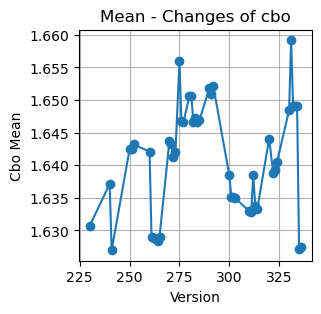

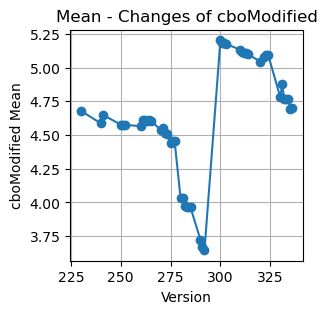

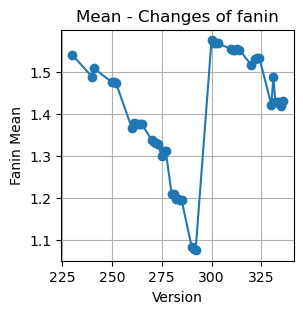

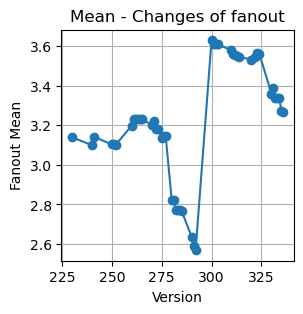

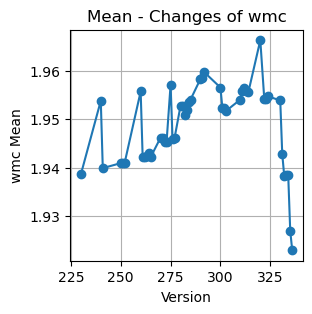

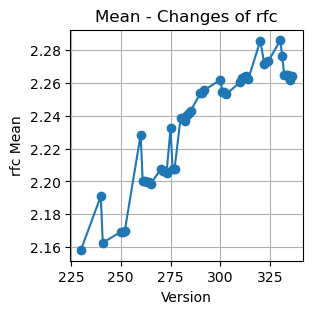

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['cbo'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Cbo Mean')
plt.title('Mean - Changes of cbo')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['cboModified'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('cboModified Mean')
plt.title('Mean - Changes of cboModified')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['fanin'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Fanin Mean')
plt.title('Mean - Changes of fanin')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['fanout'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Fanout Mean')
plt.title('Mean - Changes of fanout')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['wmc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('wmc Mean')
plt.title('Mean - Changes of wmc')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['rfc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('rfc Mean')
plt.title('Mean - Changes of rfc')
plt.grid(True)
plt.show()


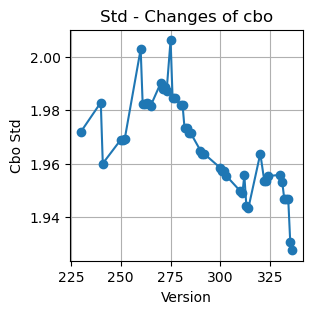

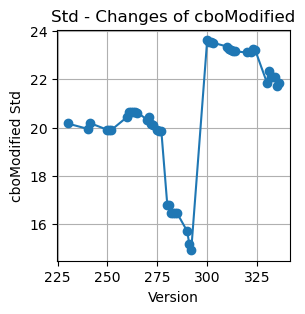

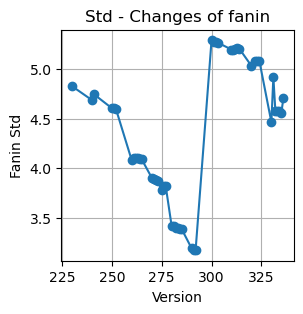

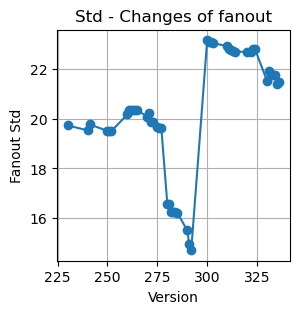

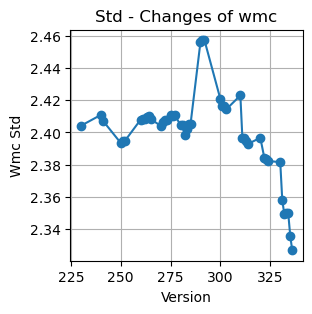

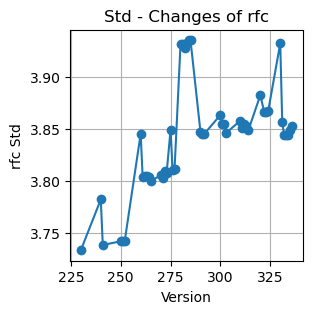

In [10]:
plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['cbo'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Cbo Std')
plt.title('Std - Changes of cbo')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['cboModified'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('cboModified Std')
plt.title('Std - Changes of cboModified')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['fanin'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Fanin Std')
plt.title('Std - Changes of fanin')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['fanout'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Fanout Std')
plt.title('Std - Changes of fanout')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['wmc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Wmc Std')
plt.title('Std - Changes of wmc')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['rfc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('rfc Std')
plt.title('Std - Changes of rfc')
plt.grid(True)
plt.show()

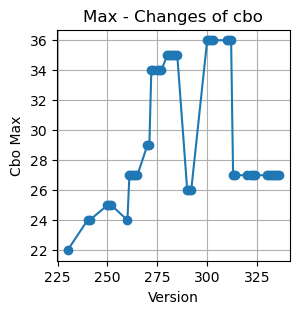

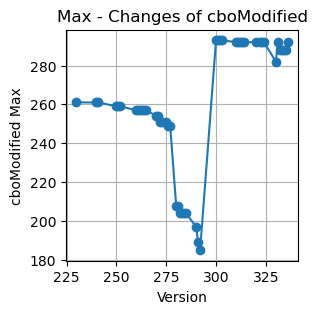

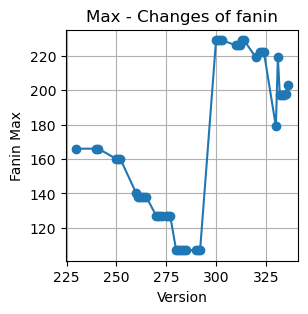

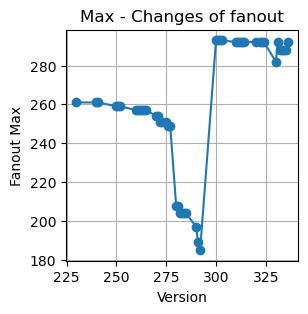

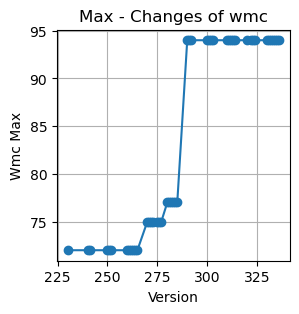

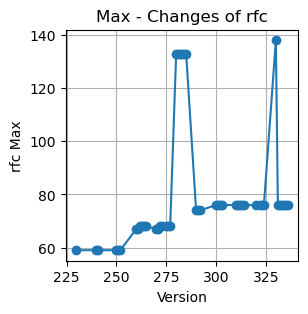

In [11]:
plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['cbo'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Cbo Max')
plt.title('Max - Changes of cbo')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['cboModified'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('cboModified Max')
plt.title('Max - Changes of cboModified')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['fanin'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Fanin Max')
plt.title('Max - Changes of fanin')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['fanout'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Fanout Max')
plt.title('Max - Changes of fanout')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['wmc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Wmc Max')
plt.title('Max - Changes of wmc')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['rfc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('rfc Max')
plt.title('Max - Changes of rfc')
plt.grid(True)
plt.show()


In [12]:
mergedMeanBugCountsDf = pd.merge(meanCkGroupedVersions, hadoopBugsGroupedDf, on="Version", how='inner')
mergedStdBugCountsDf = pd.merge(stdCkGroupedVersions, hadoopBugsGroupedDf, on="Version", how='inner')
mergedMaxBugCountsDf = pd.merge(maxCkGroupedVersions, hadoopBugsGroupedDf, on="Version", how='inner')

mergedMeanNewFeatureCountsDf = pd.merge(meanCkGroupedVersions, hadoopImprovementsGroupedDf, on="Version", how='inner')
mergedStdNewFeatureCountsDf = pd.merge(stdCkGroupedVersions, hadoopImprovementsGroupedDf, on="Version", how='inner')
mergedMaxNewFeatureCountsDf = pd.merge(maxCkGroupedVersions, hadoopImprovementsGroupedDf, on="Version", how='inner')

mergedMeanImprovementCountsDf = pd.merge(meanCkGroupedVersions, hadoopNewFeaturesGroupedDf, on="Version", how='inner')
mergedStdImprovementCountsDf = pd.merge(stdCkGroupedVersions, hadoopNewFeaturesGroupedDf, on="Version", how='inner')
mergedMaxImprovementCountsDf = pd.merge(maxCkGroupedVersions, hadoopNewFeaturesGroupedDf, on="Version", how='inner')


In [13]:
t_mergedMeanBugCountsDf = mergedMeanBugCountsDf.drop(columns=['Version'])
t_mergedStdBugCountsDf = mergedStdBugCountsDf.drop(columns=['Version'])
t_mergedMaxBugCountsDf = mergedMaxBugCountsDf.drop(columns=['Version'])

t_mergedMeanNewFeatureCountsDf = mergedMeanNewFeatureCountsDf.drop(columns=['Version'])
t_mergedStdNewFeatureCountsDf = mergedStdNewFeatureCountsDf.drop(columns=['Version'])
t_mergedMaxNewFeatureCountsDf = mergedMaxNewFeatureCountsDf.drop(columns=['Version'])

t_mergedMeanImprovementCountsDf = mergedMeanImprovementCountsDf.drop(columns=['Version'])
t_mergedStdImprovementCountsDf = mergedStdImprovementCountsDf.drop(columns=['Version'])
t_mergedMaxImprovementCountsDf = mergedMaxImprovementCountsDf.drop(columns=['Version'])




Satır sayısı: 48, Sütun sayısı: 9
(48, 8)
(48,)
X_train boyutu (33, 8)
x_test boyutu (15, 8)
y_train boyutu (33, 1)
y_test boyutu (15, 1)
[[ 748]
 [1168]
 [ 202]
 [  32]
 [ 216]
 [  23]
 [  20]
 [   6]
 [  17]
 [  30]
 [ 260]
 [  21]
 [  12]
 [   9]
 [  27]]
[[ 100.94129731]
 [ 125.93782928]
 [  26.09711255]
 [  87.14114397]
 [-228.87615782]
 [  50.63505384]
 [ 110.29387892]
 [  54.43700342]
 [ 102.71667351]
 [  93.24927601]
 [ 383.15424138]
 [   2.04996274]
 [ 116.62696109]
 [ 113.61285793]
 [  90.61411302]]


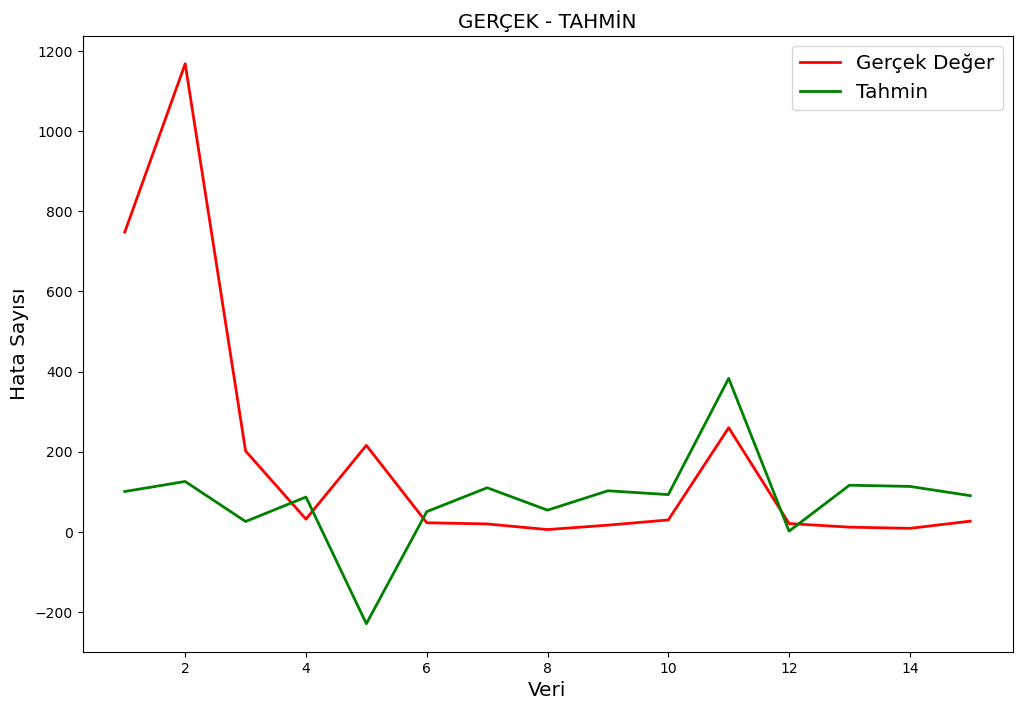

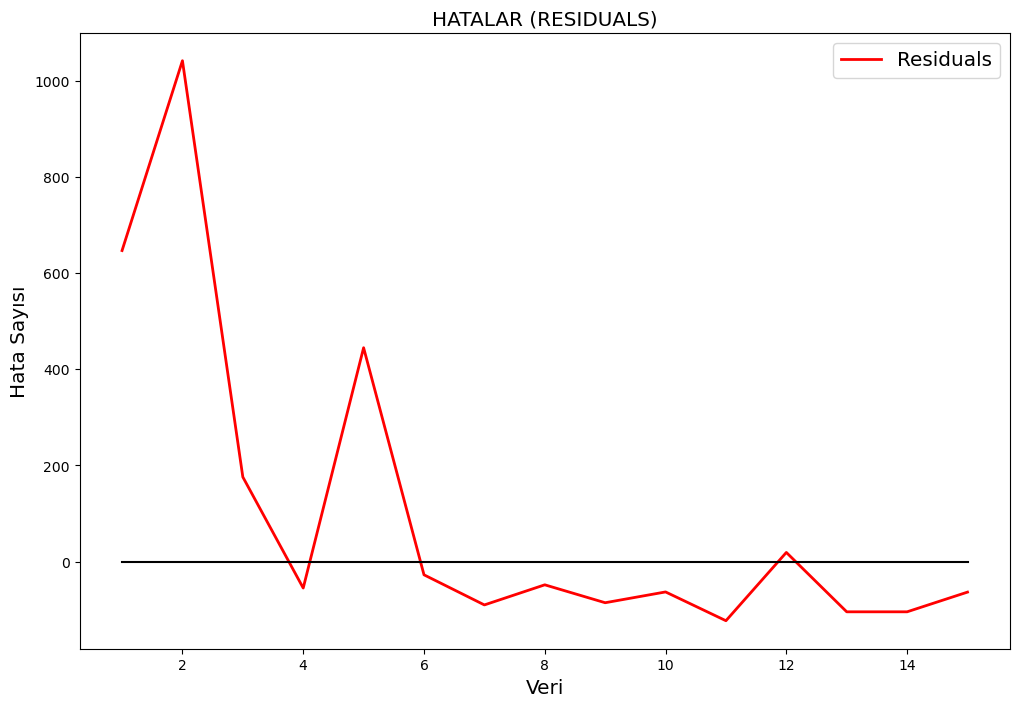

-15.12106699290583
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     3.421
Date:                Fri, 26 Jan 2024   Prob (F-statistic):             0.0105
Time:                        13:49:15   Log-Likelihood:                -192.75
No. Observations:                  33   AIC:                             401.5
Df Residuals:                      25   BIC:                             413.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3653.5824

In [24]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

df = t_mergedMaxBugCountsDf
df.columns = df.columns.str.upper()


rows, columns = df.shape
print(f"Satır sayısı: {rows}, Sütun sayısı: {columns}")


lr= LinearRegression()

X = df[['CBO','CBOMODIFIED','FANIN','FANOUT','WMC','RFC','LOC', 'NUMERICVERSION' ]]
y = df['COUNT']

print(X.shape)
print(y.shape)

Y = y.values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=100)
print("X_train boyutu", x_train.shape)
print("x_test boyutu", x_test.shape)
print("y_train boyutu", y_train.shape)
print("y_test boyutu", y_test.shape)

lr.fit(x_train, y_train)

katsayılar = pd.DataFrame(lr.coef_, columns = ['CBO','CBOMODIFIED','FANIN','FANOUT','WMC',
                                               'RFC','LOC', 'NUMERICVERSION'])

katsayılar

y_pred = lr.predict(x_test)


print (y_test)
print (y_pred)

#Çizdir
indexler = range(1,16)
#Gerçek değer
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test, label = 'Gerçek Değer', color = 'red', linewidth=2)

#Gerçek değer
ax.plot(indexler, y_pred, label ='Tahmin', color='green', linewidth=2)

plt.title('GERÇEK - TAHMİN', fontsize='x-large')
plt.xlabel('Veri', fontsize='x-large')
plt.legend(loc='upper left', fontsize='x-large')
plt.ylabel('Hata Sayısı', fontsize='x-large')
plt.legend(loc='upper left')
plt.legend(fontsize='x-large')  # Büyük boyutta legend
plt.show()


#Hata Analizi
indexler = range(1,16)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test - y_pred, label = 'Residuals', color ='red', linewidth=2)

ax.plot(indexler, np.zeros(15), color='black')

plt.title('HATALAR (RESIDUALS)', fontsize='x-large')
plt.xlabel('Veri', fontsize='x-large')
plt.ylabel('Hata Sayısı', fontsize='x-large')
plt.legend(fontsize='x-large')  # Büyük boyutta legend
plt.show()


# Means Squared Error Hesaplama

r_2 = r2_score(y_test, y_pred)

print(r_2 *100)



import statsmodels.api as sm


X_train_ols = sm.add_constant(x_train)

sm_model = sm.OLS(y_train, X_train_ols)

sonuc = sm_model.fit()

print(sonuc.summary())


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

correlation_matrix = t_mergedMeanBugCountsDf.corr(method='pearson')

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='white')

plt.colorbar()
plt.title('Pearson Korelasyon Matrisi (Hadoop Method)')
correlation_matrix.columns = ['CBO', 'CBO*', 'FANIN', 'FANOUT', 'WMC', 'RFC', 'LOC', 'Döngü Sayısı',
       'Version', 'Hata Sayısı']
correlation_matrix.index = ['CBO', 'CBO*', 'FANIN', 'FANOUT', 'WMC', 'RFC', 'LOC', 'Döngü Sayısı',
       'Version', 'Hata Sayısı']
plt.xticks(np.arange(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix)), correlation_matrix.index)
plt.tight_layout()
plt.show()


ValueError: Length mismatch: Expected axis has 9 elements, new values have 10 elements

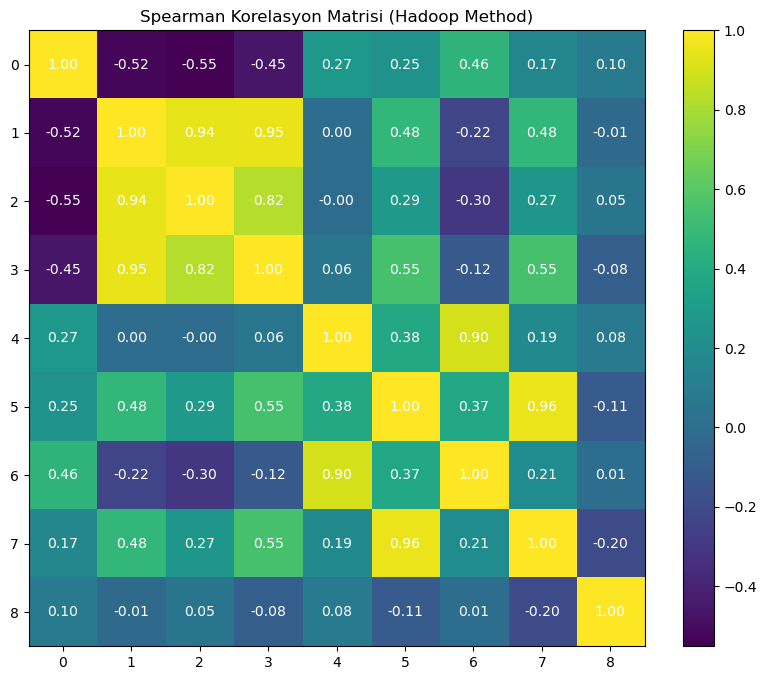

In [15]:
import numpy as np
import matplotlib.pyplot as plt

correlation_matrix = t_mergedMeanBugCountsDf.corr(method='spearman')

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='white')

plt.colorbar()
plt.title('Spearman Korelasyon Matrisi (Hadoop Method)')
correlation_matrix.columns = ['CBO', 'CBO*', 'FANIN', 'FANOUT', 'WMC', 'RFC', 'LOC', 'Döngü Sayısı',
       'Version', 'Hata Sayısı']
correlation_matrix.index = ['CBO', 'CBO*', 'FANIN', 'FANOUT', 'WMC', 'RFC', 'LOC', 'Döngü Sayısı',
       'Version', 'Hata Sayısı']
plt.xticks(np.arange(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix)), correlation_matrix.index)
plt.tight_layout()
plt.show()


In [16]:
import statsmodels.api as sm


t_mergedMeanBugCountsDf = mergedMeanBugCountsDf.drop(columns=['Version'])
t_mergedStdBugCountsDf = mergedStdBugCountsDf.drop(columns=['Version'])
t_mergedMaxBugCountsDf = mergedMaxBugCountsDf.drop(columns=['Version'])

t_mergedMeanNewFeatureCountsDf = mergedMeanNewFeatureCountsDf.drop(columns=['Version'])
t_mergedStdNewFeatureCountsDf = mergedStdNewFeatureCountsDf.drop(columns=['Version'])
t_mergedMaxNewFeatureCountsDf = mergedMaxNewFeatureCountsDf.drop(columns=['Version'])

t_mergedMeanImprovementCountsDf = mergedMeanImprovementCountsDf.drop(columns=['Version'])
t_mergedStdImprovementCountsDf = mergedStdImprovementCountsDf.drop(columns=['Version'])
t_mergedMaxImprovementCountsDf = mergedMaxImprovementCountsDf.drop(columns=['Version'])

df = t_mergedMeanImprovementCountsDf;

X = df[neededColumnsMethod]  # Independent variables
y = df['Count']  # Dependent variable

# Create and fit the model
model = sm.OLS(y, X).fit()

# Print the coefficients
print(model.params)


cbo            162.448687
cboModified     -7.950804
fanin          -19.744634
fanout          11.793830
wmc           -351.991205
rfc            -68.923090
loc             86.230866
dtype: float64
